# A brief tour of the IPython notebook

The IPython Notebook is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media, etc. It aims to be an agile tool for both exploratory computation and data analysis, and provides a platform to support reproducible research, since all inputs and outputs may be stored in a one-to-one way in notebook documents.

Keyboard Shortcuts
![title](./ipy_keyboard.png)

In [1]:
pwd

u'/Users/somya/Dropbox/Teaching/Big Data/slides/ipy/Ipy_intro'

In [2]:
ls

Ipython_notebook_intro.ipynb  logo.png
ipy_keyboard.png              python-logo.svg


In [3]:
message = 'The IPython notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The IPython notebook is great!


## Plots with matplotlib

IPython adds an 'inline' matplotlib backend,
which embeds any matplotlib figures into the notebook.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


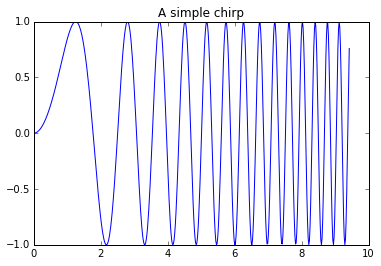

In [5]:
x = linspace(0, 3*pi, 500)
plot(x, sin(x**2))
title('A simple chirp');

You can paste blocks of input with prompt markers, such as those from
[the official Python tutorial](http://docs.python.org/tutorial/interpreter.html#interactive-mode)

In [6]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print "Be careful not to fall off!"

Be careful not to fall off!


Errors are shown in informative ways:

In [7]:
%run non_existent_file

ERROR: File `u'non_existent_file.py'` not found.


In [8]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: integer division or modulo by zero

When IPython needs to display additional information (such as providing details on an object via `x?`
it will automatically invoke a pager at the bottom of the screen:

In [9]:
magic

## Non-blocking output of kernel

If you execute the next cell, you will see the output arriving as it is generated, not all at the end.

In [10]:
import time, sys
for i in range(8):
    print i,
    time.sleep(0.5)

0 1 2 3 4 5 6 7


## Clean crash and restart

We call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [ ]:
import sys
from ctypes import CDLL
# This will crash a Linux or Mac system; equivalent calls can be made on Windows
dll = 'dylib' if sys.platform == 'darwin' else '.so.6'
libc = CDLL("libc.%s" % dll) 
libc.time(-1)  # BOOM!!

## Markdown cells can contain formatted text and code

You can *italicize*, **boldface**

* build
* lists

and embed code meant for illustration instead of execution in Python:

    def f(x):
        """a docstring"""
        return x**2

or other languages:

    if (i=0; i<n; i++) {
      printf("hello %d\n", i);
      x += 4;
    }

Courtesy of MathJax, you can include mathematical expressions both inline: 
$e^{i\pi} + 1 = 0$  and displayed:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

## Rich displays: include anyting a browser can show

Note that we have an actual protocol for this, see the `display_protocol` notebook for further details.

### Images

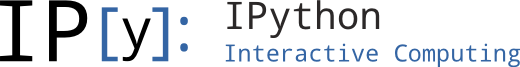

In [3]:
from IPython.display import Image
Image(filename='./logo.png')

An image can also be displayed from raw data or a url

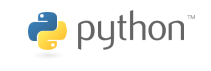

In [4]:
Image('https://www.python.org/static/community_logos/python-logo.png')

SVG images are also supported out of the box (since modern browsers do a good job of rendering them):

In [5]:
from IPython.display import SVG
SVG(filename='python-logo.svg')

#### Embedded vs Non-embedded Images

As of IPython 0.13, images are embedded by default for compatibility with QtConsole, and the ability to still be displayed offline.

Let's look at the differences:

In [6]:
# by default Image data are embedded
Embed      = Image(    'http://www.google.fr/images/srpr/logo3w.png')

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url='http://www.google.fr/images/srpr/logo3w.png')

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url='http://www.google.fr/images/srpr/logo3w.png', embed=True)

Today's Google doodle, (at the time I created this notebook). This should also work in the Qtconsole.
Drawback is that the saved notebook will be larger, but the image will still be present offline.

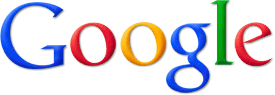

In [7]:
Embed

Today's Google doodle, visible only with an active internet connection, that should be different from the previous one. This will not work on Qtconsole.
Notebook saved with this kind of image will be lighter and always reflect the current version of the source, but the image won't display offline.

In [8]:
SoftLinked

Of course, if you re-run this notebook, the two doodles will be the same again.
<!-- well actually I cheated a little, by setting Embed Url to http://www.google.com/logos/2012/doisneau12-hp.jpg  then editing the ipynb myself and replacing it by the other url -->

### Video

And more exotic objects can also be displayed, as long as their representation supports 
the IPython display protocol.

For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other
hosted content is trivial):

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('aFztjgfDWDA')

### External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia
page for mobile users:

In [10]:
from IPython.core.display import HTML
HTML('<iframe src=https://en.wikipedia.org/?useformat=mobile width=700 height=350>')

### Mathematics

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).  

Note that this is *different* from the above examples.  Above we were typing mathematical expressions
in Markdown cells (along with normal text) and letting the browser render them; now we are displaying
the output of a Python computation as a LaTeX expression wrapped by the `Math()` object so the browser
renders it.  The `Math` object will add the needed LaTeX delimiters (`$$`) if they are not provided:

In [11]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

With the `Latex` class, you have to include the delimiters yourself.  This allows you to use other LaTeX modes such as `eqnarray`:

In [12]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Loading external codes
* Drag and drop a ``.py`` in the dashboard
* Use ``%load`` with any local or remote url: [the Matplotlib Gallery!](http://matplotlib.sourceforge.net/gallery.html)

In this notebook we've kept the output saved so you can see the result, but you should run the next
cell yourself (with an active internet connection).

Let's make sure we have pylab again, in case we have restarted the kernel due to the crash demo above

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


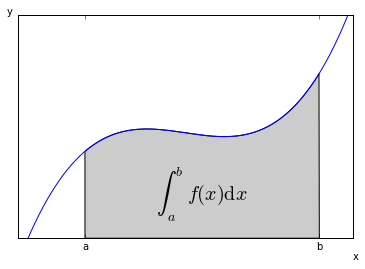

In [14]:
# %load http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()


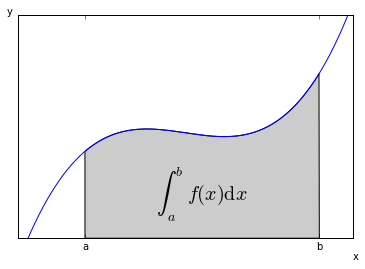

In [16]:
# %load http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()
